**LOG6308 : Tp1 - Recommendation by collaborative filtering-**


*   Ali Akbar Sabzi Dizajyekan 2078921
*   Mathusan Kathirithamby -2113367

---




In [ ]:
import numpy as np
import pandas as pd 
import os 
import random
import math
from statistics import mean
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
import more_itertools
from sklearn.metrics.pairwise import cosine_similarity
import tqdm
from datetime import datetime
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**path to data just change this path to your data and run all**

In [ ]:

#path pour Mathusan
PATH_DATA = '/content/drive/MyDrive/POLYTECHNIQUE/Hiver2022/System de recommendation/TP1'
# PATH_DATA = "/content/drive/MyDrive/Colab Notebooks/POLTECHNIQUE/Hiver2022/System de recommendation/TP1"


In [ ]:
# items 
items = pd.read_csv(os.path.join(PATH_DATA, 'items.csv'), sep='|')
# users
user = pd.read_csv(os.path.join(PATH_DATA, 'u.csv'), sep='|')
# votes
votes = pd.read_csv(os.path.join(PATH_DATA, 'votes.csv'), sep='|')

In [ ]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user

,id,age,gender,job,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
votes

,user.id,item.id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


**création de matrice utilisateur-item**

In [ ]:
user_item=votes.pivot(index="user.id", columns="item.id", values="rating")
user_item

item.id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user.id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1

In [ ]:
#fonction to calculate MSE 
def MSE(prediction, target):  
    return (((prediction - target) ** 2).mean())

## 1.1- Without cross validation

In [ ]:
#function to create a dataframe of the mean of rating based on grouping different columns as criteria (e.g. "user.id", "item.id")
def calculate_mean(df, criteria_column,rating_column):
  df_mean=df.groupby(df[criteria_column]).agg({rating_column:['mean']}).reset_index() #grouping similar ids (user or item depending on the input) and calculating mean of rating
  df_mean.columns=[criteria_column, rating_column+".predict"] #renaming column as "rating.predict" to be more readable
  df_mean_criteria=df.merge(df_mean,on=criteria_column) #merging the created dataframe with original dataframe ("votes") to have a prediction and reported results
  return df_mean_criteria

In [ ]:
def mean_without_cross_validation(df):
  #  random vote
  # distribution of original rating was used to avoid bias due to distribution
  random.seed(10)
  df_random=pd.DataFrame(random.sample(list(df["rating"]),len(df["rating"]))) # random sampling of "rating" column
  err_random=MSE(df_random[0],df["rating"]) #calculate error by MSE function
  print("error of random vote without cross validation:",  err_random)

   #mean of all votes
  err_globalMean=MSE(df["rating"].mean(),df["rating"]) #calculate error by MSE function
  print("error of total mean vote without cross validation:",  err_globalMean)
  #mean vote of users
  df_user_mean=calculate_mean(votes,"user.id","rating" )
  err_userMean=MSE(df_user_mean["rating.predict"],df_user_mean["rating"]) #calculate error by MSE function
  print("error of mean vote of user without cross validation:",  err_userMean)
  # mean vote of items
  df_item_mean=calculate_mean(df,"item.id","rating" )
  err_UserMean=MSE(df_item_mean["rating.predict"],df_item_mean["rating"]) #calculate error by MSE function
  print("error of mean vote of item without cross validation:",  err_UserMean)
  # expected vote
  df_expected_mean=pd.merge(df_user_mean,df_item_mean,on=["user.id","item.id","rating"])
  df_expected_mean["rating.predict.expected"]=df_expected_mean[["rating.predict_x","rating.predict_y"]].mean(axis=1)

  err_expectMean=MSE(df_expected_mean["rating.predict.expected"],df_expected_mean["rating"]) #calculate error by MSE function
  print("error of expected vote with cross validation:",  err_expectMean)
  # return df_item_mean

df_item_mean=mean_without_cross_validation(votes[["user.id","item.id","rating"]]) 

error of random vote without cross validation: 2.52662
error of total mean vote without cross validation: 1.2671283803995788
error of mean vote of user without cross validation: 1.0625729554387353
error of mean vote of item without cross validation: 1.0001400439578285
error of expected vote with cross validation: 0.9347196188908814


# 1.2- With 10-fold cross validation

In [ ]:
#function to create a dataframe of the mean of rating based on grouping different columns as criteria (e.g. "user.id", "item.id")
def calculate_mean_cross_valid(df_train,df_valid, criteria_column,rating_column):
  df_mean=df_train.groupby(df_train[criteria_column]).agg({rating_column:['mean']}).reset_index() #grouping similar ids (user or item depending on the input) and calculating mean of rating
  df_mean.columns=[criteria_column, rating_column+".predict"] #renaming column as "rating.predict" to be more readable
  df_mean_criteria=pd.merge(df_valid,df_mean,on=criteria_column) #merging the created dataframe with original dataframe ("votes") to have a prediction and reported results
  # df_mean_criteria[rating_column+".predict"].fillna((df_mean_criteria[rating_column+".predict"].mean()), inplace=True) #replace NaN (missing) values with the mean of column
  return df_mean_criteria

In [ ]:
start_time = datetime.now()
def mean_cross_validation(df,fold=10):
  df = df.sample(frac = 1,random_state=1) #shuffling the dataframe to make cross-validation randomize
  err_random_list=[]
  err_globalMean_list=[]
  err_userMean_list=[]
  err_itemMean_list=[]
  rating_item_list=[]
  rating_user_list=[]
  err_expectMean_list=[]
  df_result=pd.DataFrame()
  # err_expectMean_list=[]
  p_values=[]
  error_list=[]


  for i in range(fold):
    #creating validation and training datasets
    df_valid=df.iloc[int(len(df.index)*i*1/fold):int(len(df.index)*(i+1)*1/fold)] #validation chunk
    df_train=df.drop(df_valid.index) # creating training chunk by removing valiation index from original df
    df_valid=df_valid.reset_index(drop=True) # reindexing validation set to start from 0

    #Random rating
    random.seed(10)
    df_pred=pd.DataFrame(random.sample(list(df_train["rating"]),len(df_valid["rating"]))) # creating a prediction dataframe by random selection of "rating" from training chunk with the length of validation chunk
    df_pred.columns=["rating.predict.random"] #renaming the column of prediction dataframe
    err_random_list.append(MSE(df_pred["rating.predict.random"],df_valid["rating"])) #calculate error using function MSE

    #total Mean of ratings
    df_pred["rating.predict.globalMean"]=df_train["rating"].mean() #adding new column of for prediction of rating based on mean of "rating"
    err_globalMean_list.append(MSE(df_pred["rating.predict.globalMean"],df_valid["rating"])) #calculate error based on MSE function

    #User rating Mean
    df_user_mean=calculate_mean_cross_valid(df_train,df_valid,"user.id","rating" )
    err_userMean_list.append(MSE(df_user_mean["rating.predict"],df_user_mean["rating"])) #calculate error using function MSE

    #item rating Mean
    df_item_mean=calculate_mean_cross_valid(df_train,df_valid,"item.id","rating" )
    err_itemMean_list.append(MSE(df_item_mean["rating.predict"],df_item_mean["rating"])) #calculate error using function MSE

    #mean of user mean and item mean
    df_expected_mean=pd.merge(df_user_mean,df_item_mean,how="left",on=["user.id","item.id","rating"],suffixes=('.user', '.item')) #merging two previous dataframes (user_mean and item_mean)

    #there are 160 items with 1 vote, therefore it is not possible to create mean in the training dataset for them, I filled these items with mean of users vote
    df_expected_mean['rating.predict.item'].fillna(df_expected_mean['rating.predict.user'], inplace=True) #filled NaN values in the user mean
    df_expected_mean["rating.predict.expected"]=df_expected_mean[["rating.predict.user","rating.predict.item"]].mean(axis=1) #creating a column for the expected of user and item
    err_expectMean_list.append(MSE(df_expected_mean["rating.predict.expected"],df_expected_mean["rating"])) #calculate error using function MSE

    #adding the result to the final df this df is just to observe the results of user mean,item mean and expected mean for future use or visualizations
    df_result=pd.concat([df_result,df_expected_mean],ignore_index=True)

    #p_value of 2 set of MSE created during 10 round of cross validation
    p_value_mean=ttest_ind(err_userMean_list, err_itemMean_list).pvalue

  print("error of random vote with cross validation:",  mean(err_random_list))
  print("error of total mean vote with cross validation:",   mean(err_globalMean_list))
  print("error of mean vote of user with cross validation:",  mean(err_userMean_list))
  print("error of mean vote of item with cross validation:",  mean(err_itemMean_list))
  print("error of expected vote with cross validation:",  mean(err_expectMean_list))
  print("p-value between MSE of user mean and MSE of item mean:",p_value_mean)

  return df_result,err_userMean_list,err_itemMean_list


df_result,err_userMean_list,err_itemMean_list =mean_cross_validation(votes[["user.id","item.id","rating"]])


end_time = datetime.now()
print(f'Duration of execution of code: {end_time - start_time}')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


error of random vote with cross validation: 2.53785
error of total mean vote with cross validation: 1.2671682096543104
error of mean vote of user with cross validation: 1.08473758097675
error of mean vote of item with cross validation: 1.0437939454848935
error of expected vote with cross validation: 0.9632807387106957
p-value between MSE of user mean and MSE of item mean: 3.1279291792222896e-08
Duration of execution of code: 0:00:01.199526


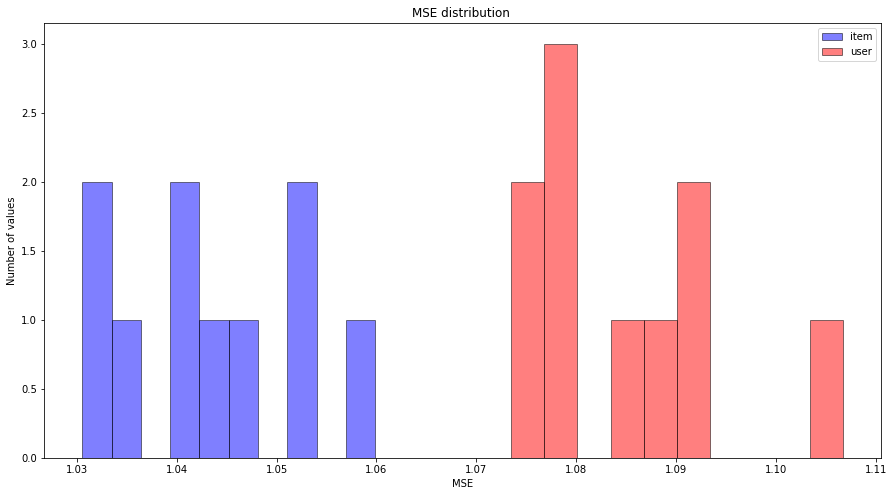

In [ ]:
plt.figure(figsize=(15,8))

plt.hist(err_itemMean_list, ec = 'black', alpha=0.5, label="item",color= 'b')
plt.hist(err_userMean_list, ec = 'black', alpha=0.5, label="user",color= 'r')
# labels
plt.title('MSE distribution ')
plt.xlabel('MSE')
plt.ylabel('Number of values')
plt.legend(loc='upper right')
plt.show()

**Conclusion Question 1:**

1.   The expected mean of user and item votes incorporate heterogenity of lines and columns therefore gives the lowes error comparing to other naive mean methods which can be considered as baseline for future methods.

1.   p-value between MSE of item and user mean is less than 0.05, therefore the difference between these two errors is not random and we can say that item mean gives better result than user mean.
2.   visualization of MSE of user and item mean from 10 round of cross validation clearly shows that these two sets are separated.

1.   The comparison of error results from cross validation and the calculation without cross validation, shows that cross validation has not positive effect on the error. In fact since it reduces the training data, the error increases eventually. Cross validation is usually used to calculated and fix a hyperparameter (e.g. number of nearest neighbors) but in this question we do not have hyperparameter so it just eliminate part of data which causes the method loses its resolution.
1.   a dataframe called "df_result" is created from the code which can be used to observe the result of all cross validation round together. 

1.   The execution time for 10 fold cross validation and calculating all means are less than 1 second.






 


# Question 2

In [ ]:
def cos_similarity(df) : 

    # return pd.DataFrame(cosine_similarity(df.fillna(0), df.fillna(0)))
    return np.dot(df.fillna(0),df.fillna(0).T)/np.dot(np.reshape(np.linalg.norm(df.fillna(0), axis=1), (-1, 1)),np.reshape(np.linalg.norm(df.fillna(0), axis=1), (1, -1)))




def correlation_similarity(df) : 
  # return np.array(df.T.corr(method="pearson"))
  return(np.array(df.T.cov())/np.matmul(np.reshape(np.array(df.T.std()), (-1, 1)),np.reshape(np.array(df.T.std()), (1, -1))))


# print(cos_similarity(user_item))
# print(correlation_similarity(train_matrix))

**Note**

*   Calculation of correlation matrix based on "Pearson" gives different result when using the internal module of Pandas which is because of difference in handling missing data. In Python method only common votes are considered to calculate correlation. But I considered whole data to calculate Covariance and variance.



In [ ]:
start_time = datetime.now() #timing
np.seterr(divide='ignore', invalid='ignore') #to avoid warning messages

def filter_col_cross_validation(df, similarity,method,fold=5,):
    
    df_shuffle = df.sample(frac = 1,random_state=1) #shuffling the dataframe to make cross-validation randomize
    error_list=[]

    for i in range(fold):
      #creating validation and training datasets
      df_valid=df_shuffle.iloc[int(len(df.index)*i*1/fold):int(len(df.index)*(i+1)*1/fold)] #validation chunk
      df_train=df_shuffle.copy() #creating training dataset
      df_train.loc[df_valid.index, 'rating']=np.NaN #replacing the ratings that chosen for validation with NaN in the training dataset  
      if method=="item-item":
        train_matrix=df_train.pivot(index="item.id", columns="user.id", values="rating") #creating user-item dataframe
      elif method=="user-user":
        train_matrix=df_train.pivot(index="user.id", columns="item.id", values="rating") #creating item-user dataframe
      train_matrix=train_matrix.replace(0,np.nan)
      not_Non_matrice=train_matrix.notna() #creating bolean matrice for missing values
      if similarity=="correlation":
        W_matrix=correlation_similarity(train_matrix) #W matrix by correlation
        W_matrix[np.isnan(W_matrix)] = 0 #replacing possible Nan values with 0
        np.fill_diagonal(W_matrix, 0) # replacing diagonal of W matrix with 0
        k=np.dot(abs(W_matrix),np.array(not_Non_matrice))+1e-7 #k matrix with smoothing possible 0 values
      elif similarity=="cosine":
        W_matrix=cos_similarity(train_matrix)  #W matrix by cosinus similarity
        W_matrix[np.isnan(W_matrix)] = 0 #replacing possible Nan values with 0
        np.fill_diagonal(W_matrix, 0) # replacing diagonal of W matrix with 0
        k=np.dot(abs(W_matrix),np.array(not_Non_matrice)) # K matrix
     
      mean_vec=np.array(np.reshape(np.array(train_matrix.mean(axis=1)),(-1,1))) #calculating mean vector and reshaping it to be a column vector
      mean_matrix=np.tile(mean_vec,(1,train_matrix.shape[1])) #creating mean matrix by repeating mean vector to the length of training matrix
      cent_matrix_mean=(np.array(train_matrix)-mean_vec) #centered matrix
      cent_matrix_mean[np.isnan(cent_matrix_mean)] = 0 #replacing Nan values with 0
      #calculation ofprediction matrix and converting it to dataframe with proper names for column
      if method=="item-item":
        result_matrix_total= pd.DataFrame(mean_matrix+((np.dot(W_matrix,cent_matrix_mean))/k)).stack().reset_index().rename(columns={"level_0":"item.id","level_1":"user.id" ,0: "rating.predict"})
      if method=="user-user":
        result_matrix_total= pd.DataFrame(mean_matrix+((np.dot(W_matrix,cent_matrix_mean))/k)).stack().reset_index().rename(columns={"level_0":"user.id","level_1":"item.id" ,0: "rating.predict"})
      #adjusting user.id and item.id after conversion from numpy to dataframe columns
      result_matrix_total["user.id"]+=1
      result_matrix_total["item.id"]+=1
      #extracting the ratings that should be predicted and exists in the validation set
      valid_prediction=result_matrix_total.merge(df_valid, how="right", on=["user.id","item.id"])
      #calculating error
      error_list.append(MSE(valid_prediction["rating.predict"],valid_prediction["rating"]))
    return error_list


print("MSE with cosinus similarity and user-user approach:",mean(filter_col_cross_validation(votes,"cosine", "user-user")))
print("MSE with correlation similarity and user-user approach:",mean(filter_col_cross_validation(votes,"correlation", "user-user")))
print("MSE with cosinus similarity and item-item approach:",mean(filter_col_cross_validation(votes,"cosine", "item-item")))
print("MSE with correlation similarity and item-item approach:",mean(filter_col_cross_validation(votes,"correlation", "item-item")))

end_time = datetime.now()
print(f'Duration of execution of code: {end_time - start_time}')            





MSE with cosinus similarity and user-user approach: 0.9077898225250284
MSE with correlation similarity and user-user approach: 0.9028781049587937
MSE with cosinus similarity and item-item approach: 0.8707602430131489
MSE with correlation similarity and item-item approach: 0.9088688064997178
Duration of execution of code: 0:00:56.563307


**Conclusion Question 2**

1.   Collaborative filtering reduces error comparing to naive averaging method
2.   The best result obtained by item-item approach with cosine similarity

1.   The execution time for the two approach of user-user and item-item with two similarity relation is about 42 sec. 





# Bonus Question

In [ ]:
#function to calculate euclidian distance between rows of a matrix
def create_dist_list(train_set, _norm=np.linalg.norm):
  distance_lists=[]
  for i in  tqdm.tqdm(range(len(train_set))):
    dist_list=[]
    for j in range(len(train_set)):
      if i==j:
        dist_list.append(0)
      else:
        dist=train_set[i:i+1,:][0]-train_set[j:j+1,:][0]
        dist[np.isnan(dist)] = 0
        dist_list.append(_norm(dist))
    distance_lists.append(dist_list)
  return pd.DataFrame(distance_lists)
# dist_matrix=create_dist_list(np.array(train_matrix), _norm=np.linalg.norm)

In [ ]:
#calculate common vote matrix
def common_votes(train_set):
  train_set[np.isnan(train_set)] = 0
  train_set_bool=np.array(train_set.astype(bool).astype(int))
  nvc=np.dot(np.array(train_set_bool),np.array(train_set_bool.T))

  return nvc
# nvc=common_votes(train_matrix)

In [ ]:
np.seterr(divide='ignore', invalid='ignore')

def find_k_near_neighbor(df,n,fold=5):
  
  df_shuffle = df.sample(frac = 1,random_state=1) #shuffling the dataframe to make cross-validation randomize
  # error_dict={}
  # for n in near_neighor_no:
    # print(k)
  error_list=[]
  for i in range(fold):
  #creting validation and training datasets
    df_valid=df_shuffle.iloc[int(len(df_shuffle.index)*i*1/fold):int(len(df_shuffle.index)*(i+1)*1/fold)] #validation chunk
    df_train=df_shuffle.copy()
    df_train.loc[df_valid.index, 'rating']=np.NaN
    train_matrix=df_train.pivot(index="item.id", columns="user.id", values="rating")
    votes_nvc=common_votes(train_matrix) #calculate common vote matrix
    train_matrix=train_matrix.replace(0,np.nan) # changing 0 values to nan so that they don't be considered in the calculations
    dist_matrix=create_dist_list(np.array(train_matrix), _norm=np.linalg.norm) #create disatnce matrix
    normal_dist=dist_matrix/votes_nvc # creating normalized distance matrix to leverage the items with more common votes 
    normal_dist[np.isnan(normal_dist)] = 0 #change all missing values in the distance matrix to 0
    normal_dist[normal_dist==0]=1000000 # converting 0 values to a large number so not to be considered as near neighbor
      ##replacing 0 distances with a large number, the probability that two different rows with considerable number of common votes have 0 distance is very low,/
    ###so when the distance is 0 it is the distance of the same row to itself or the rows that have no common votes
    normal_dist=np.array(normal_dist)
    df_result=pd.DataFrame()
    for j in range(len(normal_dist)):
      k_neighbors_index=np.argsort(normal_dist[j:j+1], axis=1)[0][:n] #find k nearest neighbor
      neighbor_data=pd.concat([train_matrix.iloc[j:j+1,:],train_matrix.iloc[list(k_neighbors_index),:]],ignore_index=True) #concatenate the target line with n nearest neighbor to build train matrix
      neighbor_data=neighbor_data.replace(0,np.nan) #replace 0 values to nan to avoid their participation in the calculation
      not_Non_matrice=neighbor_data.notna() #nan matrix
      W_matrix=cos_similarity(neighbor_data) #cosine similarity matrix
      W_matrix[np.isnan(W_matrix)] = 0 #setting possible nan values to 0
      np.fill_diagonal(W_matrix, 0)  # changing diagonal values to 0
      k=np.dot(abs(W_matrix),np.array(not_Non_matrice)) # k matrix
      mean_vec=np.array(np.reshape(np.array(neighbor_data[neighbor_data!=0].mean(axis=1)),(-1,1))) #mean vector 
      mean_matrix=np.tile(mean_vec,(1,neighbor_data.shape[1])) #creating mean matrix by repeating mean vector to the length of training matrix
      cent_matrix_mean=(np.array(neighbor_data)-mean_vec) #centered matrix
      cent_matrix_mean[np.isnan(cent_matrix_mean)] = 0
      result_matrix_total= pd.DataFrame(mean_matrix+((np.dot(W_matrix,cent_matrix_mean))/k))  #the prediction matrix
      df_result=pd.concat([df_result,result_matrix_total.iloc[0:1,]],ignore_index=True) # extracting first row of prediction matrix and concatinating to the target matrix and repeating the loop
      # print(df_result)
    df_result=df_result.stack().reset_index().rename(columns={"level_0":"item.id","level_1":"user.id" ,0: "rating.predict"}) #converting to dataframe with proper naming
    df_result["user.id"]+=1 #compensating user.id and item.id columns after conversion
    df_result["item.id"]+=1
    valid_prediction=df_result.merge(df_valid, how="right", on=["user.id","item.id"]) # extracting validation data to compare with original data
    fold_error=MSE(valid_prediction["rating.predict"],valid_prediction["rating"]) # error of the fold
    error_list.append(fold_error)
  print(error_list) #print error at each fold 
  error_mean=mean(error_list)
  
  return error_mean

         
# find_k_near_neighbor(votes,near_neighbor_no)


      





In [ ]:
start_time = datetime.now()
n=10
print(f"The mean error for {n} neighbor is:" ,find_k_near_neighbor(votes,n))
end_time = datetime.now()
print(f'Duration of execution of code: {end_time - start_time}')

100%|██████████| 1682/1682 [01:09<00:00, 24.11it/s]


[0.9993628087248181, 0.9947144013009361, 1.00634396912522, 0.9994089279432656, 1.0184103868526007]
The mean error for 10 neighbor is: 1.0036480987893681
Duration of execution of code: 0:11:29.903931


In [ ]:
start_time = datetime.now()
n=25
print(f"The mean error for {n} neighbors is:" ,find_k_near_neighbor(votes,n))
end_time = datetime.now()
print(f'Duration of execution of code: {end_time - start_time}')

100%|██████████| 1682/1682 [01:00<00:00, 27.71it/s]


[0.905028044721427, 0.9061301362506252, 0.9226021577671806, 0.8986680111062914, 0.9090468834195747]
The mean error for 25 neighbors is: 0.9082950466530197
Duration of execution of code: 0:09:03.517276


In [ ]:
start_time = datetime.now()
n=50
print(f"The mean error for {n} neighbors is:" ,find_k_near_neighbor(votes,n))
end_time = datetime.now()
print(f'Duration of execution of code: {end_time - start_time}')

100%|██████████| 1682/1682 [00:59<00:00, 28.15it/s]


[0.8669206391498069, 0.8685625343369231, 0.8829174529904247, 0.8647973371087556, 0.870829873537063]
The mean error for 50 neighbors is: 0.8708055674245947
Duration of execution of code: 0:09:27.373224


In [ ]:
start_time = datetime.now()
n=100
print(f"The mean error for {n} neighbors is:" ,find_k_near_neighbor(votes,n))
end_time = datetime.now()
print(f'Duration of execution of code: {end_time - start_time}')

100%|██████████| 1682/1682 [01:01<00:00, 27.43it/s]


[0.8548622091387328, 0.8546807307187824, 0.8698488077012562, 0.8515614350602575, 0.8584989267965262]
The mean error for 100 neighbors is: 0.857890421883111
Duration of execution of code: 0:10:26.612225


**Conclusion for K-NN**

1.   As the number of neighbors increases from 10 to 100 the MSE decreases
2.   MSE for 100 neighbors is better than the case of whole dataset



# Question 3

---



In [ ]:
#function that centers df values by its mean of row or coluumn or combinatination of both
def df_centering(df,mean_type):

  #find columns mean
  column_mean=df.mean(axis=0)
  #finding rows mean
  row_mean=df.mean(axis=1)

  if mean_type=="combinedMean":
    #finding outer mean of row and column mean
    mean_df=pd.DataFrame((np.add.outer(np.array(row_mean),np.array(column_mean)))/2)
    #adjusting index
    mean_df.set_index(mean_df.index+1, inplace=True)
    #adjusting columns
    mean_df.rename(columns=lambda x: x+1,inplace=True)
    #fill remaining NaN values in combined mean by row mean
    mean_df.T.fillna(df.mean(axis=1), inplace=True)

  if mean_type=="rowMean":
    #reshaping mean vector to be a column vector
    row_mean=np.array(np.reshape(np.array(row_mean),(-1,1)))
    #creating mean matrix by repeating mean vector to the length of training matrix
    mean_df=pd.DataFrame(np.tile(row_mean,(1,df.shape[1])))
    #adjusting index
    mean_df.set_index(mean_df.index+1, inplace=True)
    #adjusting columns
    mean_df.rename(columns=lambda x: x+1,inplace=True)

  if mean_type=="columnMean":
    #reshaping mean vector to be a row vector
    column_mean=np.array(np.reshape(np.array(column_mean),(1,-1)))
    #creating mean matrix by repeating mean vector to the length of training matrix
    mean_df=pd.DataFrame(np.tile(column_mean,(df.shape[0],1)))
    #adjusting index
    mean_df.set_index(mean_df.index+1, inplace=True)
    #adjusting columns
    mean_df.rename(columns=lambda x: x+1,inplace=True)
    #fill remaining NaN values in column mean by row mean
    mean_df.T.fillna(df.mean(axis=1), inplace=True)

  #centering df by its mean
  df_center=df-mean_df
  return df_center, mean_df


In [ ]:
def svd(R,i):
    #sortie u,sifma et v_trans par svd comme vu dans la video:
    u,sigma, v_trans=np.linalg.svd(R,full_matrices=False)
    #transform our 1-dimensional matrix into a diagonal matrix with nrow*nrow format:
    sigma=np.diag(sigma) 
    #make a prediction matrix by redoing the matrix multiplication of u,
    #sigma and v_trans but using only the latent dimensions given by i:
    prediction=np.linalg.multi_dot([u[:,:i],sigma[:i,:i],v_trans[:i,:]])
    #source:
    #https://numpy.org/doc/stable/reference/generated/numpy.tile.html
    #https://stackoverflow.com/questions/45264141/convert-array-into-dataframe-in-python
    return prediction

In [ ]:
def svd_cv_updated(df,fold,dimension):
  #shuffling dataset
    df_shuffle = df.sample(frac = 1,random_state=1)
    error_list=[] #liste of MSE that is going to be empty to begin with
    for i in range(fold):
        
        #validation chunk
        df_valid=df_shuffle.iloc[int(len(df.index)*i*1/fold):int(len(df.index)*(i+1)*1/fold)] 
        #creating training dataset
        df_train=df_shuffle.copy() 
        #replacing the ratings that chosen for validation with NaN in the training dataset 
        df_train.loc[df_valid.index, 'rating']=np.NaN  
        #creating user-item dataframe
        train_matrix=df_train.pivot(index="user.id", columns="item.id", values="rating") 
        
        #we are going to center the values of train_matrix using its means  matrix and
        #we are going to have the values of all the means in R_mean_fill:
        R_norm, R_mean_fill = df_centering(train_matrix, "combinedMean")
        R_norm.fillna(0, inplace=True)

        #here dimension represents the number of latent dimensions that are going to be used in the svd function
        pred=svd(R_norm,dimension)+R_mean_fill
        
        #turn the resulting 2d-DataFrame into multiple component DataFrame just like the original votes DataFrame:
        pred=pred.stack().reset_index().rename(columns={"level_0":"user.id","level_1":"item.id" ,0: "rating.predict"})

        #extracting the ratings that should be predicted and exists in the validation set:
        valid_prediction=pred.merge(df_valid, how="right", on=["user.id","item.id"])
        #calculating error
        error_list.append(MSE(valid_prediction["rating.predict"],valid_prediction["rating"]))
    return error_list 

In [ ]:
%%time
fold=5
#results for different k list:
k_dict={}
for k in range (5,21,3):
    k_dict[k]=mean(svd_cv_updated(votes,fold,k))
print("error for different dimension reduction is:\n",k_dict)
#les valeurs ici sont pour k=5,8,11,14,17,20
#on obtiens donc que la meilleur methode est quand k=14

error for different dimension reduction is:
 {5: 0.9083008468056367, 8: 0.9005089377255642, 11: 0.8977143140159575, 14: 0.8982256486007765, 17: 0.8987304826965038, 20: 0.9003223783227158}
CPU times: user 1min 31s, sys: 13.5 s, total: 1min 44s
Wall time: 1min 1s


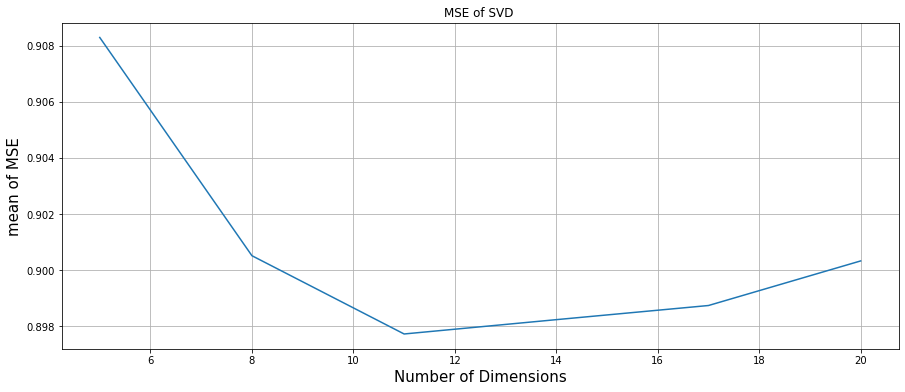

In [ ]:
plt.figure(figsize=(15,6))
plt.title('MSE of SVD ')
plt.xlabel('Number of Dimensions',fontsize=15)
plt.ylabel('mean of MSE',fontsize=15)
plt.grid(True)
plt.plot(list(k_dict.keys()),list(k_dict.values()))

###Conclusion Q3


*   the running time for 6 different dimension is 61s which is about 10s for each dimension.
*   The best results obtained by using 11 to 14 dimensions (MSE=0.89) which is better than baseline expected mean in Q1, but item-item method with cosine similarity gave better result (MSE=0.87) with quite the same running time.




# Question 4

to implement K-means we have used two methods:


1.   In the first method training and validation set are centered using combined mean of train matrix and then missing values were replaced by a small number (1e-7). After that, K_means are estimated using centered training matrix. Then based on the correlation of each line of validation matrix and K-centroid matrix the best centered was chosen to replace the chosen line of validation set. Then the mean matrix was added to the matrix and we have the prediction matrix.
2.   In the second method mean matrix of training set was used to calculate K-means and the training and validation set were NOT centered. Based on the correlation of each line validation set and K-means matrix the best centroid was chosen to be used as prediction.



In [ ]:
#function that centers df values by its mean of row or coluumn or combinatination of both
def df_centering(df,mean_type):

  #find columns mean
  column_mean=df.mean(axis=0)
  #finding rows mean
  row_mean=df.mean(axis=1)

  if mean_type=="combinedMean":
    #finding outer mean of row and column mean
    mean_df=pd.DataFrame((np.add.outer(np.array(row_mean),np.array(column_mean)))/2)
    #adjusting index
    mean_df.set_index(mean_df.index+1, inplace=True)
    #adjusting columns
    mean_df.rename(columns=lambda x: x+1,inplace=True)
    #fill remaining NaN values in combined mean by row mean
    mean_df.T.fillna(df.mean(axis=1), inplace=True)

  if mean_type=="rowMean":
    #reshaping mean vector to be a column vector
    row_mean=np.array(np.reshape(np.array(row_mean),(-1,1)))
    #creating mean matrix by repeating mean vector to the length of training matrix
    mean_df=pd.DataFrame(np.tile(row_mean,(1,df.shape[1])))
    #adjusting index
    mean_df.set_index(mean_df.index+1, inplace=True)
    #adjusting columns
    mean_df.rename(columns=lambda x: x+1,inplace=True)

  if mean_type=="columnMean":
    #reshaping mean vector to be a row vector
    column_mean=np.array(np.reshape(np.array(column_mean),(1,-1)))
    #creating mean matrix by repeating mean vector to the length of training matrix
    mean_df=pd.DataFrame(np.tile(column_mean,(df.shape[0],1)))
    #adjusting index
    mean_df.set_index(mean_df.index+1, inplace=True)
    #adjusting columns
    mean_df.rename(columns=lambda x: x+1,inplace=True)
    #fill remaining NaN values in column mean by row mean
    mean_df.T.fillna(df.mean(axis=1), inplace=True)

  #centering df by its mean
  df_center=df-mean_df
  return df_center, mean_df


In [ ]:
def compute_correlation_cluster(clusters,valid_matrix):
  
  #prediction df
  result_df=pd.DataFrame()
  centroid=pd.DataFrame(clusters)
  centroid.rename(columns=lambda x: x+1,inplace=True)
  for i in list(valid_matrix.index):

    #creating a matrix with o row from validation matrix and K row of cluster centers
    valid_correlation=valid_matrix[valid_matrix.index==i].append(centroid,ignore_index=True)
    #calculating correlation matrix between on row of validation and cluster centers

    W=np.array(valid_correlation.T.corr(method="pearson"))
    #replacing 1 in the diagonal with 0 to eliminate correlation of rows with themselves
    np.fill_diagonal(W, 0)
    #finding the index of highest correlation of validation row with cluster centers
    best_k=np.argsort(abs(W[0]))[-1:]-1
    #adding the chosen cluster center to to the prediction df
    result_df=pd.concat([result_df,centroid.iloc[best_k]],ignore_index=True)

  #adjusting index of prediction df with validation df
  result_df.index=valid_matrix.index
  #adjusting columns of prediction df to start from 1 and be the same as validation df
  # result_df.rename(columns=lambda x: x+1,inplace=True)
  #adding mean of training to the values in prediction df
  # print(result_df)
  return result_df

In [ ]:
%%time

np.seterr(divide='ignore', invalid='ignore') #to avoid warning messages

def k_mean(df, classes, fold=5):
    
    df_shuffle = df.sample(frac = 1,random_state=1) #shuffling the dataframe to make cross-validation randomize
    error_dict={}
    for k in classes:
      error_list=[]
      for i in range(fold):
        #creating validation and training datasets
        df_valid=df_shuffle.iloc[int(len(df_shuffle.index)*i*1/fold):int(len(df_shuffle.index)*(i+1)*1/fold)] #validation chunk
        #creating training dataset
        df_train=df_shuffle.copy()
        #replacing the ratings that chosen for validation with NaN in the training dataset
        df_train.loc[df_valid.index, 'rating']=np.NaN
        #converting dataframe to matrix with users as line
        train_matrix=df_train.pivot(index="user.id", columns="item.id", values="rating") 
        valid_matrix=df_valid.pivot(index="user.id", columns="item.id", values="rating")


        #centering training matrix, filling NaN with 1e-7 and calculating mean of matrix based on the desired method
        train_matrix_centered, trainMean_matrix=df_centering(train_matrix, "combinedMean")
        train_matrix_centered.fillna(1e-7, inplace=True)

        valid_matrix.fillna(1e-7, inplace=True)
        valid_matrix_centered=valid_matrix-trainMean_matrix
        


        #fitting Kmeans to the centered train matrix
        kmeans = KMeans(n_clusters=k,random_state=10).fit(train_matrix_centered)

        #calculating prediction based on kmeans centers
        prediction_matrix=compute_correlation_cluster(kmeans.cluster_centers_,valid_matrix_centered)+trainMean_matrix

        #converting prediction matrix to df and renaming columns
        prediction_df=prediction_matrix.stack().reset_index().rename(columns={"level_0":"user.id","level_1":"item.id" ,0: "rating.predict"})

        #extracting the validation rows from prediction df
        valid_prediction=prediction_df.merge(df_valid, how="right", on=["user.id","item.id"])


        #calculating error of each fold and adding it to the list
        error_list.append(MSE(valid_prediction["rating.predict"],valid_prediction["rating"]))
      # adding the list of errors for different fold of a kmeans
      error_dict[k]=mean(error_list)
    print(error_dict)
    return error_dict

classes=[5, 10, 20,40,80]

k_mean_errors=k_mean(votes, classes)       
        



{5: 0.9906506733919332, 10: 1.031103936919407, 20: 1.0389537517062526, 40: 1.1055812323109333, 80: 1.192056900854733}
CPU times: user 8min 3s, sys: 49.1 s, total: 8min 52s
Wall time: 7min 57s


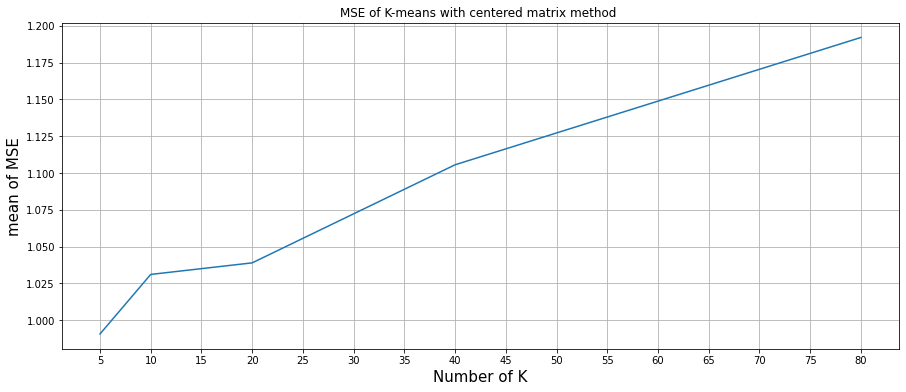

In [ ]:
plt.figure(figsize=(15,6))
plt.title('MSE of K-means with centered matrix method ')
plt.xlabel('Number of K',fontsize=15)
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('mean of MSE',fontsize=15)
plt.grid(True)
plt.plot(list(k_mean_errors.keys()),list(k_mean_errors.values()))

###Conclusion
In this method of K-means K=5 gives the lowes MSE, Its running time is 7 min. 

In [ ]:
%%time
start_time = datetime.now() #timing
np.seterr(divide='ignore', invalid='ignore') #to avoid warning messages

def k_mean_mean_matrix(df, classes, fold=5):
    
    df_shuffle = df.sample(frac = 1,random_state=1) #shuffling the dataframe to make cross-validation randomize
    error_dict={}
    for k in classes:
      error_list=[]
      for i in range(fold):
        #creating validation and training datasets
        df_valid=df_shuffle.iloc[int(len(df_shuffle.index)*i*1/fold):int(len(df_shuffle.index)*(i+1)*1/fold)] #validation chunk
        #creating training dataset
        df_train=df_shuffle.copy()
        #replacing the ratings that chosen for validation with NaN in the training dataset
        df_train.loc[df_valid.index, 'rating']=np.NaN
        #converting dataframe to matrix with users as line
        train_matrix=df_train.pivot(index="user.id", columns="item.id", values="rating") 
        valid_matrix=df_valid.pivot(index="user.id", columns="item.id", values="rating")
        vote_matrix=df_shuffle.pivot(index="user.id", columns="item.id", values="rating")


        #centering training matrix, filling NaN with 1e-7 and calculating mean of matrix based on the desired method
        train_matrix_centered, trainMean_matrix=df_centering(train_matrix, "combinedMean")


        #filling NaN in both validation and training matrix with mean values of training matrix
        valid_matrix_filled=valid_matrix.fillna(trainMean_matrix)
        train_matrix_filled=train_matrix.fillna(trainMean_matrix)

        #fitting Kmeans to the mean matrix
        kmeans = KMeans(n_clusters=k, random_state=10).fit(trainMean_matrix)

        #calculating prediction based on kmeans centers
        prediction_matrix=compute_correlation_cluster(kmeans.cluster_centers_,valid_matrix_filled)

        #converting prediction matrix to df and renaming columns
        prediction_df=prediction_matrix.stack().reset_index().rename(columns={"level_0":"user.id","level_1":"item.id" ,0: "rating.predict"})

        #extracting the validation rows from prediction df
        valid_prediction=prediction_df.merge(df_valid, how="right", on=["user.id","item.id"])

        #calculating error of each fold and adding it to the list
        error_list.append(MSE(valid_prediction["rating.predict"],valid_prediction["rating"]))
      #adding the list of errors for different fold of a kmeans
      error_dict[k]=mean(error_list)
    print(error_dict)
    return error_dict

classes=[5, 10, 20,40,80]

k_mean_error_mean=k_mean_mean_matrix(votes, classes)       
        

{5: 0.9836664720939328, 10: 0.9725469435440968, 20: 0.9679083989378249, 40: 0.9675693710406836, 80: 0.9678202365636049}
CPU times: user 22min 58s, sys: 42.6 s, total: 23min 41s
Wall time: 22min 34s


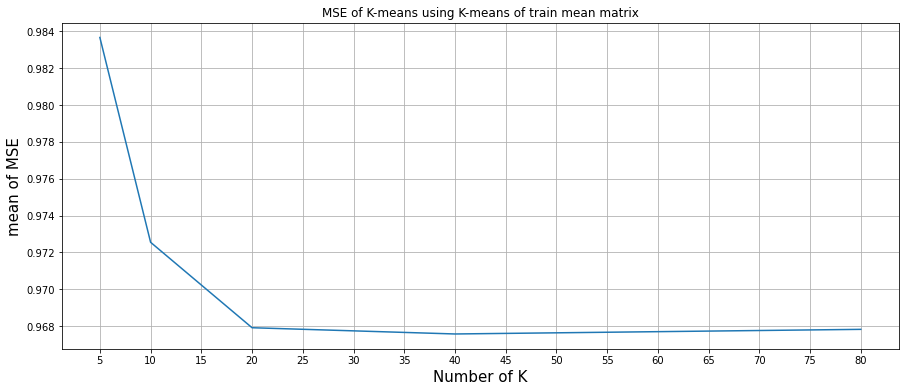

In [ ]:
plt.figure(figsize=(15,6))
plt.title('MSE of K-means using K-means of train mean matrix')
plt.xlabel('Number of K',fontsize=15)
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('mean of MSE',fontsize=15)
plt.grid(True)
plt.plot(list(k_mean_error_mean.keys()),list(k_mean_error_mean.values()))

##Conclusion
by using training meant to calculate K-means we arrive at better MSE, one reason for better results can be because of having a full matrix to calculate K-means rather than a sparse matrix in the first method. This causes to have better resolution when chosing the closest centroid to the validation matrix and gives better result. The running time is a bit slower to the first method (20 min) but the running time is better than KNN method. The best K achived at 40.

# Question 5

## CROSS-VALIDATION ERROR ESTIMATES

In [ ]:
%%time
######### COMMANDS FOR CROSS-VALIDATION MSE WITH BAYESIAN PROBABILITY ESTIMATES############
def bayesian(df,fold,user):
  #shuffling dataset
    df_shuffle = df.sample(frac = 1,random_state=1)
    error_list=[] #liste of MSE that is going to be empty to begin with
    for i in range(fold):
        #validation chunk
        df_valid=df_shuffle.iloc[int(len(df.index)*i*1/fold):int(len(df.index)*(i+1)*1/fold)] 
        #creating training dataset
        df_train=df_shuffle.copy() 
        #replacing the ratings that chosen for validation with NaN in the training dataset 
        df_train.loc[df_valid.index, 'rating']=np.NaN  
        #creating user-item dataframe
        train_matrix=df_train.pivot(index="user.id", columns="item.id", values="rating")
        
        #information about the users without the zip info which is not relevant in our study
        user_rel=user.copy()
        user_rel=user_rel.drop(" zip",1)

        #seperate the users by age, 0-young, 1-older
        user_rel.loc[user_rel[" age "]<=25," age "]=0
        user_rel.loc[user_rel[" age "]>25," age "]=1
        user_rel.rename(columns={"id ":"user.id"," age ":"age", " gender ":"gender", " job ":"job" },inplace=True)


        # 0- bad movie rating , 1- good movie rating classification
        user_item_copied=train_matrix.copy()
        user_item_copied[user_item_copied<4]=0
        user_item_copied[user_item_copied>=4]=1


        user_merged=user_rel.merge(user_item_copied,on="user.id")

        #this is a frequential method to emulate the probabilistic method of the bayesian model
        #with this method, you can aggregate the amount of positive votes (sum) over the total amount of votes(count).

        grouped_df_sum=user_merged.groupby(['age','gender','job']).agg('sum')
        grouped_df_count=user_merged.groupby(['age','gender','job']).agg('count')
        # ADDED THE +1 +2::::: ############################################################ CAREFULLL ################################################## !!!!!!!!!! ########
        #calculating the frequences through sum/count by adding the laplace additive smoothing value of +1 / +2
        grouped_df_prob=(grouped_df_sum+1)/(grouped_df_count+2)
        #grouped_df_prob=(grouped_df_sum)/(grouped_df_count)

        grouped_df_prob.fillna(0,inplace=True)
        grouped_df_prob.drop(columns=["user.id"],inplace=True)

        grouped_df_prob=grouped_df_sum/grouped_df_count
        #result of the prediction DataFrame following this formula: P(Rating=POSITIVE)*E[Rating=POSITIVE]+P(Rating=NEGATIVE)*E[Rating=NEGATIVE]

        #negative_expectation
        negative_expectation=np.nanmean(np.array(train_matrix[train_matrix<4]))
        #positive_mean
        positive_expectation=np.nanmean(np.array(train_matrix[train_matrix>=4]))

        prediction=(1-grouped_df_prob)*negative_expectation+(grouped_df_prob)*positive_expectation

        #create the classification dataframe and setting the user_id ot the index column
        classification_df=user_merged.copy()
        classification_df=classification_df.set_index("user.id")

        #taking only the right-side of the classification dataframe without the age,gender and job
        prediction_df=classification_df.copy()
        #prediction_df=prediction_df.reset_index()
        prediction_df=prediction_df.drop(columns=['age','gender','job'])
        #transforming all the values to NaN
        prediction_df[prediction_df>=0]=None
        #keeping the age,gender and job columns into a dataframe
        prediction_axis=classification_df.copy()
        prediction_axis=prediction_axis[['age','gender','job']]

        #merging the right side with the left side of the above created dataframes
        prediction_merging=[prediction_axis,prediction_df]
        prediction_empty=pd.concat(prediction_merging)

        #the prediction matrix is now empty and we could now fill it up
        prediction_empty
        #index=pd.MultiIndex.from_product(prediction_axis)
        #prediction_empty2=prediction_empty
        #prediction_empty2.set_index(['age','gender','job'])
        prediction_empty=prediction_empty#.drop(columns='user.id')
        prediction_empty.reset_index(inplace=True)
        prediction1=prediction.reset_index()
        prediction_valid=prediction1.merge(prediction_empty[['age','gender','job','user.id']], how='inner', on=['age','gender','job'])
        prediction_valid=prediction_valid.rename(columns={"user.id_y": 'user.id'})
        prediction_valid=prediction_valid.set_index("user.id")
        prediction_valid=prediction_valid.sort_index()
        prediction_valid=prediction_valid.drop(columns=['age','gender','job','user.id_x'])

        # FIND MSE WITH CROSS-VALIDATION:
        #turn the resulting 2d-DataFrame into multiple component DataFrame just like the original votes DataFrame:
        pred=prediction_valid.stack().reset_index().rename(columns={"level_0":"user.id","level_1":"item.id" ,0: "rating.predict"})

        #extracting the ratings that should be predicted and exists in the validation set:
        valid_prediction=pred.merge(df_valid, how="right", on=["user.id","item.id"])
        #calculating error
        error_list.append(MSE(valid_prediction["rating.predict"],valid_prediction["rating"])) 
    #return prediction_valid ## changer ca pour le MSE !!!!!!
    return error_list

print(bayesian(votes,5,user))
print(mean(bayesian(votes,5,user)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


[1.2460739007989794, 1.2359803120706365, 1.2321679244486041, 1.2436424947872449, 1.2254809371914013]
1.2366691138593733
CPU times: user 6.01 s, sys: 97 ms, total: 6.11 s
Wall time: 5.94 s


##Conclusion Q5
the running time is very short and for 5 fold cross-validation is about 7s.

It is normal that the probabilistic method with independence assumption gives us a higher error than the other models. Because even with the entire dataset this method is a naive bayes classifier probabilistic method which will still give us an error. So by doing a cross-validation technique, we end up with much bigger errors. If we had instead found the exact bayes non-naive classifier we would have much better result. We assume a lot of hypothesis for the probabilities to be independant. This in result, gives us a high biais. Therefore it is normal that the MSE is pretty high. This is most likely the worst prediction because of all the independance hypothesis that we assure. For example, we assume that there is no dependancy between the category of age and job. But that could'nt be furthur away from the truth. As a student, you can clearly see that there is much younger people that have "student" as a "job" category but people with  Also many of the classification may make sense but not be the optimal way of classification. For example, we subdivide the ages of the users by >25 and <=25. But by doing a simple distribution study, we can see that the median is 31. Therefore, we could have higher samples for >=25 years category. But it would also be innapropriate to not divide at 25 because most of the "student" from the job category are <=25. So this would not be accurate for the <30 years category. What we would suggest is a 4 category division illustrated in the following graph (25 and under, 25-40, 40-60 and 60+):

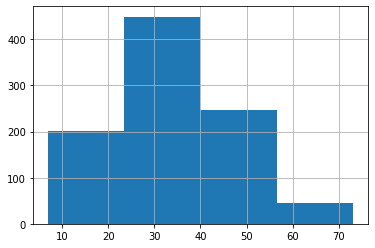

In [ ]:
#user["gender"]
profession=user[" job "] #x1
#sexe=user[" gender "] #x2
age=user[" age "] #x3 goes from 7 to 73
#numero_user=user["id "] #(user.id) to link between user and votes.
list(user.columns)
age.hist(bins=4)

##Here is the study we performed on distribution of the job and age variable. We can cleary see that some jobs have a much higher age category. We could also see from our categorical seperation of age<25 and age >=25, most of the jobs are for 30+ year old users. Therefore we cannot assume independancy between these two variables. But our naive bayes model does assume it. This could partially explain a mugh higher error with this method

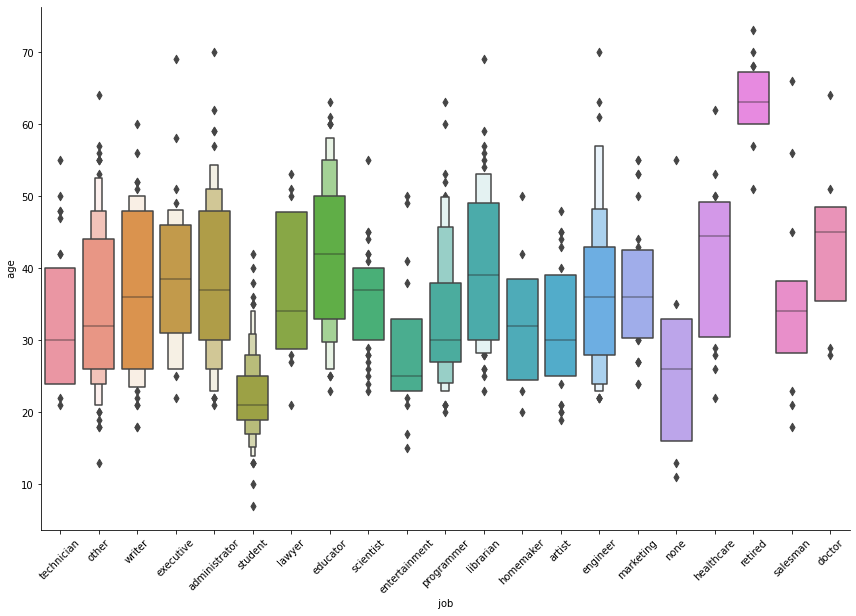

In [ ]:
#distribution study of age/job 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#user.hist(column=" age ")
#user.hist(column=" job ")
ax=sns.catplot(x=" job ", y=" age ",kind='boxen',data=user,height=8,aspect=12/8)
ax.set_xticklabels(rotation = 45)
